In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATASET/dataset1/mall_customers.csv")

In [ ]:
#drop null values

df1 = df1.dropna()


In [ ]:
#encoding
df1['Gender'] = df1['Gender'].replace({'Male': 1, 'Female': 0})

In [ ]:
#bins
df1['Age_Category'] = pd.cut(df1['Age'], bins=[18,52,70], labels=['18-52','53-70'])
df1.head()

,Customer ID,Gender,Age,Annual Income,Spending Score,Age_Category
0,1,1,19,15,39,18-52
1,2,1,21,15,81,18-52
2,3,0,20,16,6,18-52
3,4,0,23,16,77,18-52
4,5,0,31,17,40,18-52


In [ ]:


df1['Age_Category'] = df1['Age_Category'].replace({'18-52': 0, '53-70': 1})
df1.head()


,Customer ID,Gender,Age,Annual Income,Spending Score,Age_Category
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0


In [ ]:
df=df1.drop(columns=['Customer ID','Age'])

df['Age_Category'] = df['Age_Category'].replace({'18-52': 0, '53-70': 1})
df


,Gender,Annual Income,Spending Score,Age_Category
0,1,15,39,0
1,1,15,81,0
2,0,16,6,0
3,0,16,77,0
4,0,17,40,0
...,...,...,...,...
195,0,120,79,0
196,0,126,28,0
197,1,126,74,0
198,1,137,18,0


In [ ]:
x= df.drop(columns=['Spending Score'])
y= df['Spending Score']
df = df.dropna()

In [ ]:
#train and test model
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)
print(x_test)

     Gender  Annual Income Age_Category
18        1             23            0
170       1             87            0
107       1             63            1
98        1             61            0
177       1             88            0
182       1             98            0
5         0             17            0
146       1             77            0
12        0             20            1
152       0             78            0
61        1             46            0
125       0             70            0
180       0             97            0
154       0             78            0
80        1             54            1
7         0             18            0
33        1             33          NaN
130       1             71            0
37        0             34            0
74        1             54            1
183       0             98            0
145       1             77            0
45        0             39            0
159       0             78            0


In [ ]:
 # Support vector classifier
classifier = SVC(kernel='poly', random_state=0, C=1000.0, degree=3, gamma=0.03)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/base.py:485: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


In [ ]:
# prompt: find accuracy

from sklearn.metrics import accuracy_score
print(f"Accuracy : {(classifier.score(x_test,y_test))*100} %")


Accuracy : 2.0408163265306123 %


In [ ]:
#Predicting the test set result
y_pred= classifier.predict(x_test)
print(y_pred)

[55 14 35 40 88 75 88 14 42 35  6  6 75 88 88 91 75 42 42 75 14 75 88 55
 55 42 55 75 88 42 35 88 42 42  6 55 91 43 75 35 88 88 35 14 35 75 75 55
 40]


In [ ]:
#coefficent for annual income and spending score
income_coef = classifier.coef_[1][0]
spending_coef = classifier.coef_[0][1]

print(f"Coefficient for Annual Income: {income_coef}")
print(f"Coefficient for Spending Score: {spending_coef}")


Coefficient for Annual Income: 0.0
Coefficient for Spending Score: 0.044422507403751234


In [ ]:
from sklearn.preprocessing import StandardScaler
#creating an instance of standard scaler
scaler = StandardScaler()
#scaling x train and x test
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [ ]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_pred, y_test)
print(cm)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


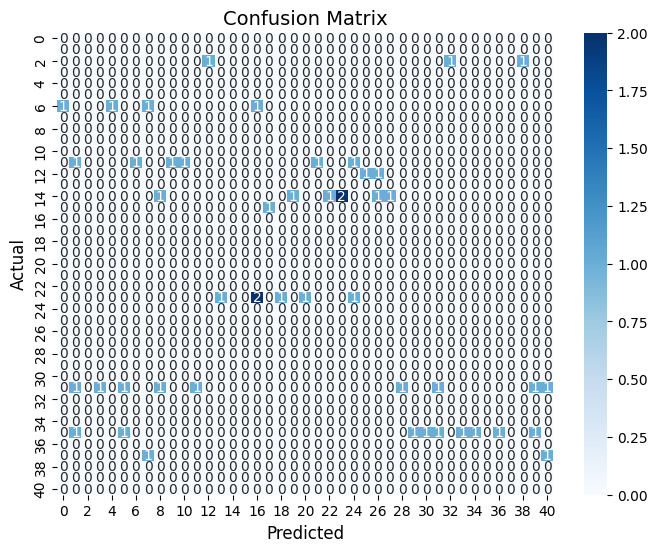

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

# Add labels and title
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()


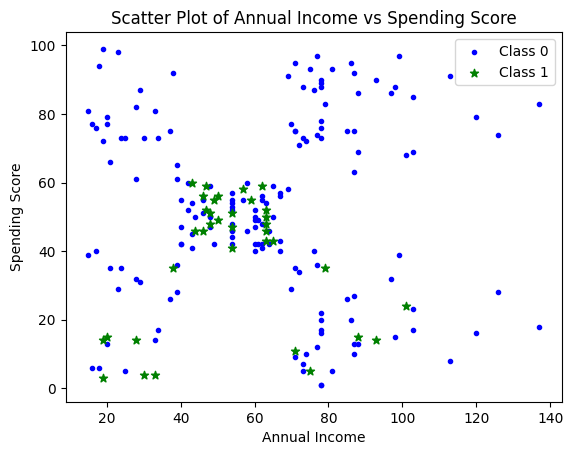

In [ ]:
import matplotlib.pyplot as plt
features = ['Annual Income', 'Spending Score']
feature_indices = [df.columns.get_loc(feature) for feature in features]


X = df.iloc[:, feature_indices]


colors = ['blue', 'green']
markers = ['.', '*']

for i, (color, marker) in enumerate(zip(colors, markers)):
    plt.scatter(df.loc[df['Age_Category'] == i, 'Annual Income'],
                df.loc[df['Age_Category'] == i, 'Spending Score'],
                color=color, marker=marker, label=f'Class {i}')


plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Scatter Plot of Annual Income vs Spending Score')
plt.legend()

plt.show()


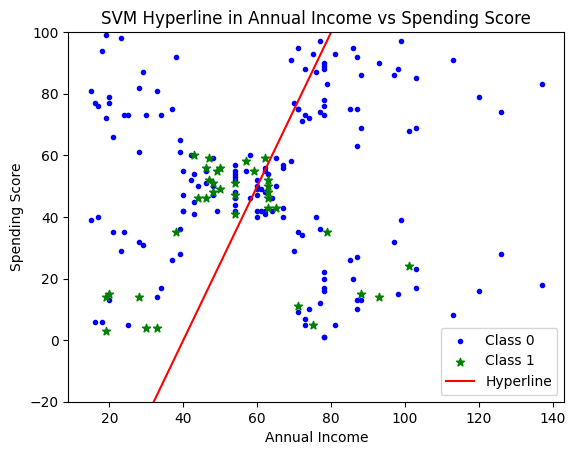

In [ ]:
coef = [0.5, -0.2]  # Coefficients for Annual Income and Spending Score
intercept = -20  # Intercept

#line equation
def line_equation(x):
    return (-coef[0] * x - intercept) / coef[1]


for i, (color, marker) in enumerate(zip(colors, markers)):
    plt.scatter(df.loc[df['Age_Category'] == i, 'Annual Income'],
                df.loc[df['Age_Category'] == i, 'Spending Score'],
                color=color, marker=marker, label=f'Class {i}')

# Plot the hyperline
x_values = [min(df['Annual Income']), max(df['Annual Income'])]
plt.plot(x_values, [line_equation(x) for x in x_values], color='red', label='Hyperline')

plt.ylim(-20, 100)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('SVM Hyperline in Annual Income vs Spending Score')
plt.legend()

plt.show()


In [ ]:
from sklearn.svm import SVC
#creating an instance for default svm kernel='rbf',C=1.0,gamma=auto
svc=SVC()
#fitting data
svc.fit(x_train,y_train)
#testing model
y_pred=svc.predict(x_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

# parameters for cross validation
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
{'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
{'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':
[0.01,0.02,0.03,0.04,0.05]}]

#performing gridsearch
grid_search = GridSearchCV(estimator = svc,param_grid = parameters,scoring = 'accuracy',cv = 5,verbose=2)
grid_search.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END ................................C=10, kernel=linear; total time=   0.0s
[CV] END ................................C=10, kernel=linear; total time=   0.0s
[CV] END ................................C=10, kernel=linear; total time=   0.0s
[CV] END ................................C=10, kernel=linear; total time=   0.0s
[CV] END ................................C=10, kernel=linear; total time=   0.0s
[CV] END ...............................C=100, kernel=linear; total time=   0.0s
[CV] END ...............................C=100,

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV] END ...............................C=100, kernel=linear; total time=   0.0s
[CV] END ...............................C=100, kernel=linear; total time=   0.0s
[CV] END ..............................C=1000, kernel=linear; total time=   0.0s
[CV] END ..............................C=1000, kernel=linear; total time=   0.0s
[CV] END ..............................C=1000, kernel=linear; total time=   0.0s
[CV] END ..............................C=1000, kernel=linear; total time=   0.0s
[CV] END ..............................C=1000, kernel=linear; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy', verbose=2)

In [ ]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 1000, 'degree': 3, 'gamma': 0.03, 'kernel': 'poly'}
